<a href="https://colab.research.google.com/github/BryanCoboF/dataScienceStudy/blob/main/graficasYAlgebra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# Librerias
from collections import defaultdict, Counter
from tabulate import tabulate
import pandas as pd
import numpy as np
import xlrd
import seaborn as sb
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive

In [4]:
from google.colab import files
from google.colab import drive

drive.mount('/content/drive') # Permite ingresar a drive desde las carpetas de drive
df = pd.read_excel("/content/drive/MyDrive/PB/Mirasilv/INGRESO SEMANAL-INV-2.xlsx") # Carga el excel de datos de proyeccion, si se necesita cambiar el archivo se debe modificar el link

Mounted at /content/drive


In [5]:
df.columns

Index(['País', 'Proyecto', 'NS. Sitio', 'Nombre del Sitio', 'Convenio-Folio',
       'No. de Resolución-Contrato', 'Fecha de Plantación',
       'Fecha de Medición', 'NS. de Medición', 'Edad en Meses', 'Edad en Años',
       'ID. Lote', 'ID. Experimento', 'ID. Tratamiento', 'NS. Tratamiento',
       'Núm. de Repetición', 'Especie', 'Árboles Originales (pa.)',
       'Árboles Vivos (pa.)', 'Supervivencia (%)', 'Ejes Vivos (Ha)',
       'Espaciamiento 1 (cm)', 'Espaciamiento 2 (cm)', 'Área Neta', 'DAP (cm)',
       'IMA DAP (cm)', 'Altura Total (m)', 'Altura Comercial (m)',
       'IMA Alt. Tot. (m)', 'Altura Dominante (m)', 'Índice de Sitio (m)',
       'Área Basal', 'ICA Área Basal', 'Volumen Total (m3/Ha)', 'IMA VT',
       'ICA Volumen Total', 'UTM (Zona)', 'UTM (Este)', 'UTM (Norte)',
       'Latitud', 'Longitud', 'ID. Único de Parcela', 'Área Neta de Lote',
       'Área Total de Lote', 'SEMANA', 'TIPO INV.'],
      dtype='object')

5096


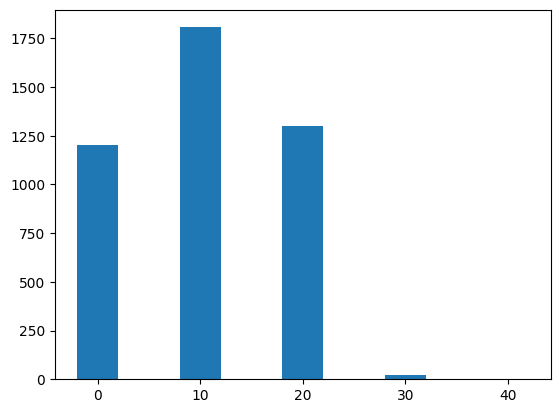

In [9]:
colAreaNeta = df['Área Neta de Lote']
colSitio = df['Nombre del Sitio']
colEdad = df['Edad en Meses']
colDap = df['DAP (cm)']
colEjesVivos = df['Ejes Vivos (Ha)']
colAT = df['Altura Total (m)']
colAC = df['Altura Comercial (m)']

colAreaNeta = np.array(colAreaNeta)
colSitio = np.array(colSitio)
colEdad = np.array(colEdad)
colDap = np.array(colDap)
colEjesVivos = np.array(colEjesVivos)
colAT = np.array(colAT)
colAC = np.array(colAC)

redondeoDap = lambda dap1 : dap1 // 10 * 10


histoRedondeoDap = Counter(redondeoDap(dap1) for dap1 in colDap)
print(sum(histoRedondeoDap.values()))
plt.bar(histoRedondeoDap.keys(), histoRedondeoDap.values(), 4)

plt.show()

['ES-01' 'ES-01' 'ES-01' 'ES-01' 'PB-51' 'PB-51' 'PB-51' 'PB-63' 'PB-63'
 'PB-63']
[18. 29. 29. 29. 12. 12. 12.  6.  6.  6.]
[16.1 23.5 19.7 18.  12.1 14.   8.   0.   0.   0. ]


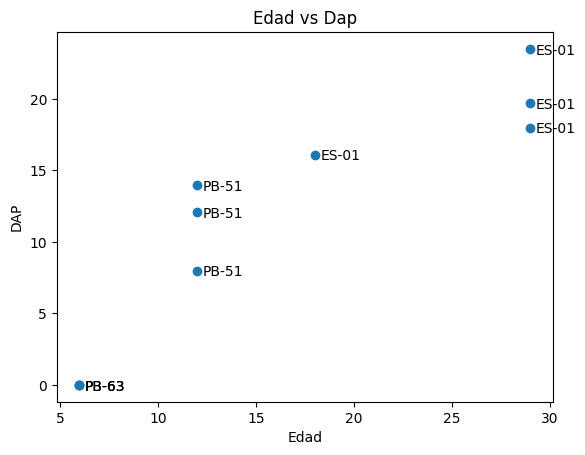

In [13]:

sitioRes = np.array([])
edadRes = np.array([])
dapRes = np.array([])
for i in range(10):
  sitioRes = np.append(sitioRes, colSitio[i])
  edadRes = np.append(edadRes, colEdad[i])
  if colDap[i] >=0 or colDap[i]<0:
    dapRes = np.append(dapRes, colDap[i])
  else:
    dapRes = np.append(dapRes, 0)

print(sitioRes)
print(edadRes)
print(dapRes)


plt.scatter(edadRes,dapRes)

for sitio, edad, da in zip(sitioRes, edadRes, dapRes):
  plt.annotate(sitio, xy=(edad, da), xytext=(4,-4),textcoords='offset points')

plt.title("Edad vs Dap")
plt.xlabel("Edad")
plt.ylabel("DAP")
plt.show()

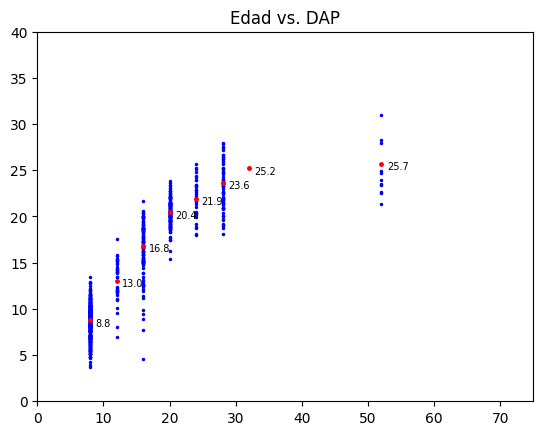

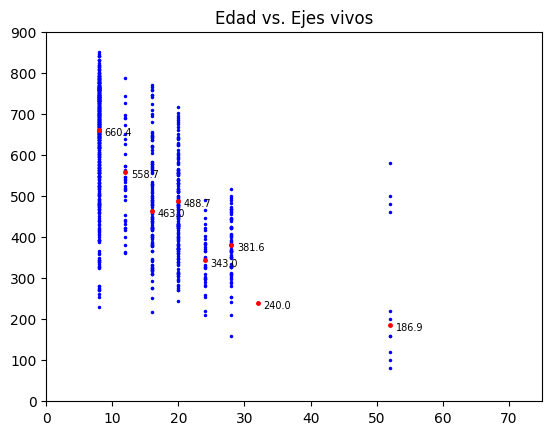

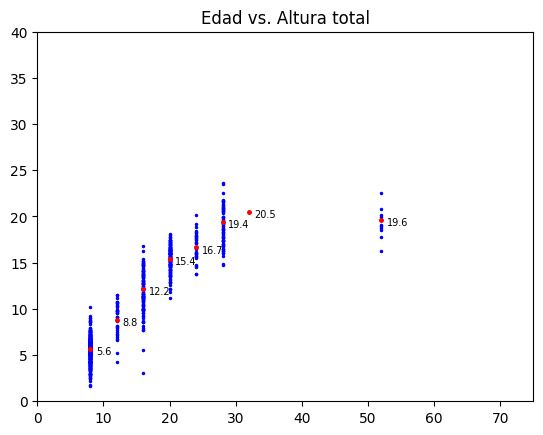

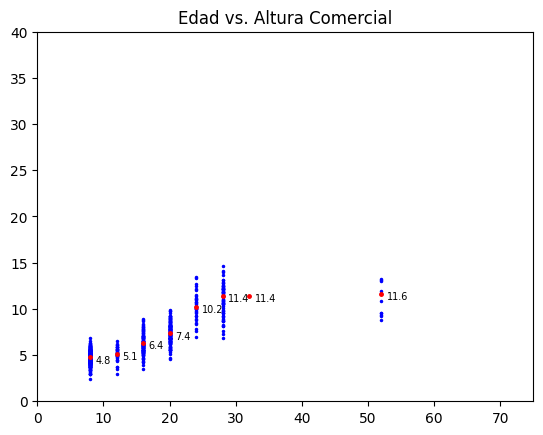

In [14]:
# Analsis de variables en edades de interes

def valoresInteres(edadDes, vecEdad,vecInteres, vecAreasNetas):
  #Funcion que obtiene todos los datos de las edades de interes definidas por el usuario
  edadInteres = []
  varInteres = []
  areasInteres = []
  #Obtencion de datos de interes (en la edad deseada)
  for age, _ in enumerate(vecEdad):
    if vecEdad[age] == edadDes and vecInteres[age] > 0:
      edadInteres.append(vecEdad[age])
      varInteres.append(vecInteres[age])
      areasInteres.append(vecAreasNetas[age])
  return edadInteres, varInteres, areasInteres

def graficaDispersion(edadV, diametroAP, varPond, variableAnalisis, rangos, edadD):
    #Funcion que grafica la variable de interes en las edades deseadas
    # edadV - es vector que recopila todos los datos iguales a la edad de interes analizada
    # diametroAP -  son los diametros correspondientes a esa medida seleccionada con la edad deseada
    # varPond - es el promedio ponderado calculado de solo los datos de cada edad deseada
    # variableAnalisis - es el string de la variable a graficar para el titulo
    # rangos - son los rangos que tendran los ejes dependiendo de la variable
    # edadD - es la edad deseada para graficar el punto con el ponderado de la variable
    plt.plot(edadV,diametroAP, 'b.', markersize = 3)
    plt.plot(edadD, varPond, 'r.', markersize = 5)
    plt.annotate(round(varPond,1), xy=(edadD, varPond), xytext=(4,-4),textcoords='offset points', fontsize=7)
    plt.title("Edad vs. " + variableAnalisis)
    plt.axis(rangos)
    #plt.show()



def ponderaVal(areaNeta, variablePond):
  #Funcion que obtiene el promedio ponderado de la variable escogida en la edad de interes
  if sum(areaNeta)>0:
    ponderacion = sum([area * variable for area, variable in zip(areaNeta, variablePond) if area>0 and variable>0])/sum(areaNeta)
  else:
    ponderacion = 0
  return  ponderacion


#Vector edades de interes
edadesGrafica = [4*c for c in range(1,60)]



variables = ["DAP", "Ejes vivos", "Altura total", "Altura Comercial"]
for vari in variables:
  for ages in edadesGrafica: # Define los rangos de interes
    if ages in colEdad:
      if vari == "DAP":
        varX, varY, vecAreasInteres = valoresInteres(ages,colEdad, colDap, colAreaNeta)
        rangoGraf = [0,75,0,40]
      if vari == "Altura total":
        varX, varY, vecAreasInteres = valoresInteres(ages,colEdad, colAT, colAreaNeta)
        rangoGraf = [0,75,0,40]
      if vari == "Altura Comercial":
        varX, varY, vecAreasInteres = valoresInteres(ages,colEdad, colAC, colAreaNeta)
        rangoGraf = [0,75,0,40]
      if vari == "Ejes vivos":
        varX, varY, vecAreasInteres = valoresInteres(ages,colEdad, colEjesVivos, colAreaNeta)
        rangoGraf = [0,75,0,900]
      if len(vecAreasInteres) > 0:
        graficaDispersion(varX, varY, ponderaVal(vecAreasInteres, varY), vari, rangoGraf,ages)
  plt.show()

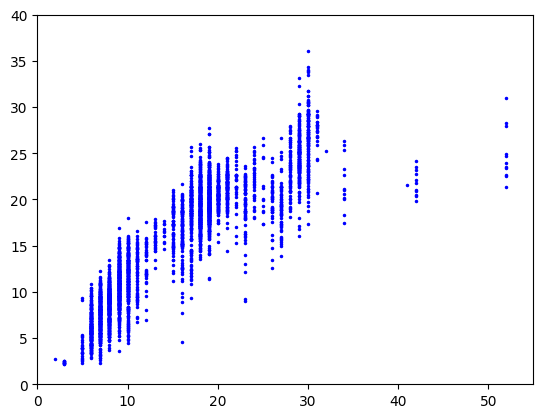

In [13]:


plt.plot(colEdad, colDap, 'b.', label = 'DAP', markersize=3)
#plt.xaxis(5)
plt.axis([0,55,0,40])
plt.show()

In [8]:
v = [1,2,3,5]
w = [3,4,5,10]

def sumaDeVectores(x,y):
  return [vi + wi for vi, wi in zip(v,w)]

sumaDeVectores(v,w)



def vectorSumPrim (vectors):
  result = vectors[0]
  for vector in vectors[1:]:
    result = sumaDeVectores(v,w)
  return result

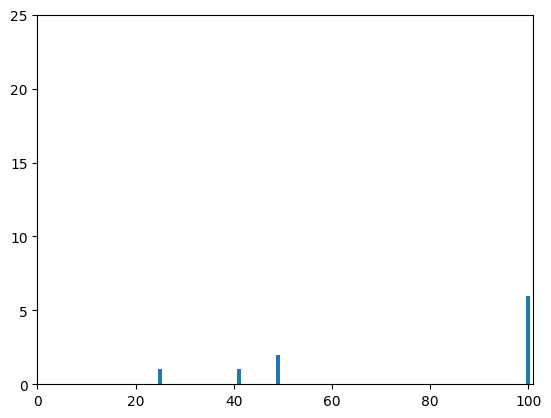

In [12]:
#Diametros
